<a href="https://colab.research.google.com/github/Arbaz9234/Sentiment-Analysis/blob/main/Amazon_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
dataframe = pd.read_csv("/content/drive/MyDrive/archive (1)/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv",usecols=['id','reviews.rating', 'reviews.text'], encoding = 'utf8')
dataframe.head()

,id,reviews.rating,reviews.text
0,AVpgNzjwLJeJML43Kpxn,3,I order 3 of them and one of the item is bad q...
1,AVpgNzjwLJeJML43Kpxn,4,Bulk is always the less expensive way to go fo...
2,AVpgNzjwLJeJML43Kpxn,5,Well they are not Duracell but for the price i...
3,AVpgNzjwLJeJML43Kpxn,5,Seem to work as well as name brand batteries a...
4,AVpgNzjwLJeJML43Kpxn,5,These batteries are very long lasting the pric...


In [ ]:
dataframe.isnull().sum()

id                0
reviews.rating    0
reviews.text      0
dtype: int64

In [ ]:
dataframe = dataframe.fillna(method = "ffill",axis = 0)

In [ ]:
dataframe.isnull().sum()

id                0
reviews.rating    0
reviews.text      0
dtype: int64

In [ ]:
import re
import string
def cleanstr(text):
    text= str(text).lower()
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    text = re.sub('\s+', ' ', text)
    text = re.sub(' \d+', ' ', text)
    return text


In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
stopwords = set(stopwords.words('english'))
stopwords.remove('not')
def remove_stopwords(text):
  token = word_tokenize(text)
  token_without_stopwords = []
  for words in token:
    if words not in stopwords:
      token_without_stopwords.append(words)
  
  text = " ".join(token_without_stopwords)
  return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from nltk.corpus import wordnet

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
lemmatizer  = WordNetLemmatizer()
def lemmatize(text):
  token = word_tokenize(text)
  word_pos_tags = nltk.pos_tag(token)
  token_with_lemmatizer = []
  for idx, tag in enumerate(word_pos_tags):
    token_with_lemmatizer.append(lemmatizer.lemmatize(tag[0], get_wordnet_pos(tag[1])))
  
  text = " ".join(token_with_lemmatizer)
  return text


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

def polarity(text):
  sia= SentimentIntensityAnalyzer()
  dic = sia.polarity_scores(text)
  return dic.get('compound')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
# sia= SentimentIntensityAnalyzer()
# sia.polarity_scores(' electric')

In [ ]:
# def word_extraction(text):
#   token = word_tokenize(text)
#   word_extracted = []
#   sia= SentimentIntensityAnalyzer()
#   for w in token:
#     dic = sia.polarity_scores(w)
#     if dic.get('neu') != 1.0 :
#       word_extracted.append(w)
  
#   text = " ".join(word_extracted)
#   return text

In [ ]:
# print(polarity("great"))

In [ ]:
def sentiments(val):
  if val>=0.25:
    return 1
  elif val<=-0.25:
    return -1
  else:
    return 0

In [ ]:
sentiment = {
            1: -1,
            2: -1,
            3: 0,
            4: 1,
            5: 1}

In [ ]:
dataframe['sentiment'] = dataframe['reviews.rating'].map(sentiment)

In [ ]:
dataframe['reviews.text'] = dataframe['reviews.text'].apply(cleanstr)
dataframe['reviews.text'] = dataframe['reviews.text'].apply(remove_stopwords)
dataframe['reviews.text'] = dataframe['reviews.text'].apply(lemmatize)
# dataframe['reviews.text'] = dataframe['reviews.text'].apply(word_extraction)
# dataframe['reviews.polarity'] = dataframe['reviews.text'].apply(polarity)
# dataframe['reviews.sentiment'] = dataframe['reviews.polarity'].apply(sentiments)

dataframe.head()

,id,reviews.rating,reviews.text,sentiment
0,AVpgNzjwLJeJML43Kpxn,3,order one item bad quality miss backup spring ...,0
1,AVpgNzjwLJeJML43Kpxn,4,bulk always less expensive way go product like,1
2,AVpgNzjwLJeJML43Kpxn,5,well not duracell price happy,1
3,AVpgNzjwLJeJML43Kpxn,5,seem work well name brand battery much good price,1
4,AVpgNzjwLJeJML43Kpxn,5,battery long lasting price great,1


In [ ]:
# dataframe.to_csv(r'/content/drive/MyDrive/archive (1)/u_1429_1.csv')

In [ ]:
dataframe.head(10)

,id,reviews.rating,reviews.text,sentiment
0,AVpgNzjwLJeJML43Kpxn,3,order one item bad quality miss backup spring ...,0
1,AVpgNzjwLJeJML43Kpxn,4,bulk always less expensive way go product like,1
2,AVpgNzjwLJeJML43Kpxn,5,well not duracell price happy,1
3,AVpgNzjwLJeJML43Kpxn,5,seem work well name brand battery much good price,1
4,AVpgNzjwLJeJML43Kpxn,5,battery long lasting price great,1
5,AVpgNzjwLJeJML43Kpxn,5,buy lot battery christmas amazonbasics cell go...,1
6,AVpgNzjwLJeJML43Kpxn,5,ive not problame battery order past pleased,1
7,AVpgNzjwLJeJML43Kpxn,5,well look cheap non rechargeable battery last ...,1
8,AVpgNzjwLJeJML43Kpxn,3,not hold amount high power juice like energize...,0
9,AVpgNzjwLJeJML43Kpxn,4,amazonbasics aa aaa battery do well appear goo...,1


In [ ]:
# positive = dataframe[dataframe['reviews.sentiment']>0]
# neutral = dataframe[dataframe['reviews.sentiment']==0]
# negative = dataframe[dataframe['reviews.sentiment']<0]

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28332 entries, 0 to 28331
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              28332 non-null  object
 1   reviews.rating  28332 non-null  int64 
 2   reviews.text    28332 non-null  object
 3   sentiment       28332 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 885.5+ KB


In [ ]:
dataframe.head()

,id,reviews.rating,reviews.text,sentiment
0,AVpgNzjwLJeJML43Kpxn,3,order one item bad quality miss backup spring ...,0
1,AVpgNzjwLJeJML43Kpxn,4,bulk always less expensive way go product like,1
2,AVpgNzjwLJeJML43Kpxn,5,well not duracell price happy,1
3,AVpgNzjwLJeJML43Kpxn,5,seem work well name brand battery much good price,1
4,AVpgNzjwLJeJML43Kpxn,5,battery long lasting price great,1


In [ ]:
dataframe['sentiment'].describe()

count    28332.000000
mean         0.845828
std          0.491952
min         -1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: sentiment, dtype: float64

In [ ]:
# dataframe['reviews.sentiment'].describe()

### Rough Model Implementation


In [ ]:
# from sklearn.model_selection import train_test_split
# x_train,x_test, y_train, y_test = train_test_split(dataframe['reviews.text'], dataframe['sentiment'], test_size = 0.33, random_state = 42)

In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer
# cv = CountVectorizer(stop_words = 'english')
# x_train = cv.fit_transform(x_train).toarray()
# x_test = cv.fit_transform(x_test).toarray()

In [ ]:
# import numpy as np
# np.any(np.isnan(y_train))

In [ ]:
# np.all(np.isfinite(y_train))

In [ ]:
# x = x[np.all(np.isfinite(x), axis=1)]

In [ ]:
# from sklearn.naive_bayes import MultinomialNB

# model = MultinomialNB()
# model.fit(x_train,y_train)

In [ ]:
# model.score(x_test, y_test)

# Model Implementation 

In [ ]:
# import pandas as pd
# dataframe = pd.read_csv('/content/drive/MyDrive/archive (1)/u_1429_1.csv',encoding = 'utf8')
# dataframe.head(15)

In [ ]:
import numpy as np
index = dataframe.index
dataframe['random_number'] = np.random.randn(len(index))
train = dataframe[dataframe['random_number'] <= 0.8]
test = dataframe[dataframe['random_number'] > 0.8]

In [ ]:
train.head()
Y_train = train['sentiment']
Y_test = test['sentiment']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC

In [ ]:
cv = CountVectorizer()
X_train  = cv.fit_transform(train['reviews.text'])
X_test = cv.transform(test['reviews.text'])

In [ ]:
X_train =  X_train.toarray()
X_test = X_test.toarray()

In [ ]:
import tensorflow as tf

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(units = 16, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dense(units = 8, activation = 'relu' ))
model.add(Dense(units = 1, activation = 'sigmoid'))

In [ ]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train, Y_train, epochs = 10)

Epoch 1/10
696/696 [==============================] - 8s 10ms/step - loss: 0.2230 - accuracy: 0.8771
Epoch 2/10
696/696 [==============================] - 5s 7ms/step - loss: -0.3725 - accuracy: 0.8624
Epoch 3/10
696/696 [==============================] - 5s 7ms/step - loss: -1.5452 - accuracy: 0.8603
Epoch 4/10
696/696 [==============================] - 6s 8ms/step - loss: -3.7720 - accuracy: 0.8618
Epoch 5/10
696/696 [==============================] - 5s 7ms/step - loss: -7.7508 - accuracy: 0.8641
Epoch 6/10
696/696 [==============================] - 5s 7ms/step - loss: -13.5851 - accuracy: 0.8653
Epoch 7/10
696/696 [==============================] - 5s 7ms/step - loss: -22.0700 - accuracy: 0.8663
Epoch 8/10
696/696 [==============================] - 5s 7ms/step - loss: -33.6721 - accuracy: 0.8657
Epoch 9/10
696/696 [==============================] - 5s 7ms/step - loss: -49.0415 - accuracy: 0.8662
Epoch 10/10
696/696 [==============================] - 5s 7ms/step - loss: -68.7362 - a

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                121888    
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 122,033
Trainable params: 122,033
Non-trainable params: 0
_________________________________________________________________


In [ ]:
test_loss, test_acc  = model.evaluate(X_test,Y_test)

190/190 [==============================] - 1s 4ms/step - loss: -64.8355 - accuracy: 0.8540


In [ ]:
print(test_loss)
print(test_acc)

-64.8355484008789
0.853960394859314


# Model Deployment


In [ ]:
text='''Product is not bad'''

text=cleanstr(text)
text=remove_stopwords(text)
text=(lemmatize(text))
print(text)

product not bad


In [ ]:
vec=cv.transform([text])
vec = vec.toarray()
print(vec)

pre= model.predict(vec)
print(pre)
if pre<=0.35:
    print("Negative")
elif pre<=0.65:
    print("Neutral")
else:
    print("Positive")

[[0 0 0 ... 0 0 0]]
1/1 [==============================] - 0s 25ms/step
[[0.]]
Negative


In [ ]:
from tensorflow.keras.models import load_model
model.save('/content/drive/MyDrive/archive (1)/model_save.hdf5')

In [ ]:
from tensorflow.keras.models import load_model
loaded_model = load_model('/content/drive/MyDrive/archive (1)/model_save.hdf5')

In [ ]:
!pip install selenium bs4
!apt-get update
!apt install chromium-chromedriver
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd
import time

options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

In [ ]:
def ScrapComment(url):
    driver=webdriver.Chrome('chromedriver',options=options)
    driver.get(url)
    prev_h = 0
    while True:
        height = driver.execute_script("""
                function getActualHeight() {
                    return Math.max(
                        Math.max(document.body.scrollHeight, document.documentElement.scrollHeight),
                        Math.max(document.body.offsetHeight, document.documentElement.offsetHeight),
                        Math.max(document.body.clientHeight, document.documentElement.clientHeight)
                    );
                }
                return getActualHeight();
            """)
        driver.execute_script(f"window.scrollTo({prev_h},{prev_h + 200})")
        # fix the time sleep value according to your network connection
        time.sleep(1)
        prev_h +=200  
        if prev_h >= height:
            break
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    driver.quit()
    title_text_div = soup.select_one('#container h1')
    title = title_text_div and title_text_div.text
    comment_div = soup.select("#content #content-text")
    comment_list = [x.text for x in comment_div]
    for x in comment_list:
        print(x)
    import pandas as pd
    df = pd.DataFrame(comment_list, columns=['reviews.text'])
    df.to_csv('Fine.csv', index=True, header=True)

if __name__ == "__main__":

    urls = "https://www.youtube.com/watch?v=8nU1bbKX0QU" 
    #"https://www.youtube.com/watch?v=XVv6mJpFOb0"
    # [
        #"https://www.youtube.com/watch?v=8nU1bbKX0QU",
        #"https://www.youtube.com/watch?v=cgNQgcUgq0U",
        #"https://www.youtube.com/watch?v=MkE_EwO76b0",
        
    #]
    ScrapComment(urls)

Great piece of art bro..
Unbeatable 

Perfect mashup

Bhai op
Best mashup
best ️️️️
Too good in the game
Very nice best of luck 
movie ka name pata hai kisi ko?



In [ ]:
import pandas as pd
dataset = pd.read_csv('/content/Fine.csv', usecols = ['reviews.text'], encoding = 'utf8')
dataset.head()

,reviews.text
0,Great piece of art bro..
1,Unbeatable
2,NaN
3,Perfect mashup
4,NaN


In [ ]:
dataset['reviews.text'] = dataset['reviews.text'].apply(cleanstr)
dataset['reviews.text'] = dataset['reviews.text'].apply(remove_stopwords)
dataset['reviews.text'] = dataset['reviews.text'].apply(lemmatize)
dataset.head()

,reviews.text
0,great piece art bro
1,unbeatable
2,nan
3,perfect mashup
4,nan


In [ ]:
dataset = dataset.fillna(method = "ffill",axis = 0)

In [ ]:
dataset.head()

,reviews.text
0,great piece art bro
1,unbeatable
2,nan
3,perfect mashup
4,nan


In [ ]:
test = cv.transform(dataset['reviews.text'])

In [ ]:
test = test.toarray()

In [ ]:
dataset['result'] = loaded_model.predict(test)

1/1 [==============================] - 0s 32ms/step


In [ ]:
dataset.head()

,reviews.text,result
0,great piece art bro,0.999847
1,unbeatable,0.999485
2,nan,0.996470
3,perfect mashup,0.999750
4,nan,0.996470


In [ ]:
def findout(data):
  if data < 0.35:
    return -1
  elif data > 0.65:
    return 1
  else:
    return 0

In [ ]:
dataset['reviews.sentiment'] = dataset['result'].apply(findout)

In [ ]:
dataset.head(10)

,reviews.text,result,reviews.sentiment
0,great piece art bro,0.999847,1
1,unbeatable,0.999485,1
2,nan,0.996470,1
3,perfect mashup,0.999750,1
4,nan,0.996470,1
5,bhai op,0.996651,1
6,best mashup,0.999348,1
7,best ️️️️,0.999348,1
8,good game,0.999662,1
9,nice best luck,0.999789,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


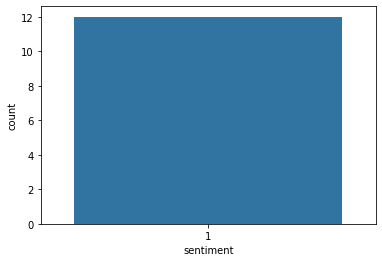

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(dataset['reviews.sentiment'])
plt.xlabel('sentiment')
plt.ylabel('count')
plt.show()

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   reviews.text       12 non-null     object 
 1   result             12 non-null     float32
 2   reviews.sentiment  12 non-null     int64  
dtypes: float32(1), int64(1), object(1)
memory usage: 368.0+ bytes


In [ ]:
dataset['reviews.sentiment'].value_counts()

1    12
Name: reviews.sentiment, dtype: int64

In [ ]:
dataset.describe()

,result,reviews.sentiment
count,12.000000,12.0
mean,0.998547,1.0
std,0.001512,0.0
min,0.996470,1.0
25%,0.996606,1.0
50%,0.999348,1.0
75%,0.999684,1.0
max,0.999847,1.0


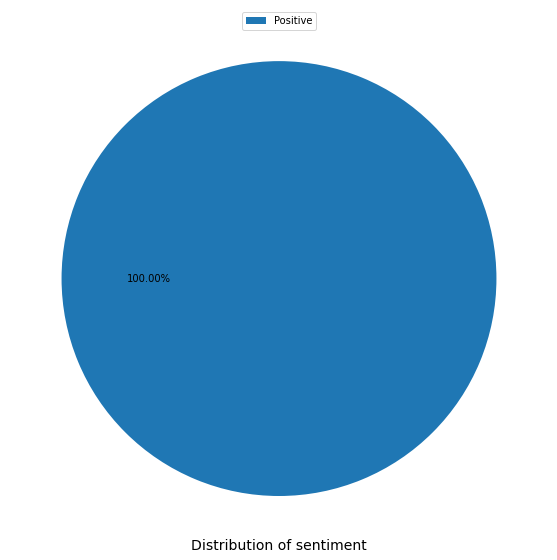

In [ ]:
plt.figure(figsize = (10, 10))
label=["Positive","Negative","Neutal"]
plt.pie(dataset['reviews.sentiment'].value_counts(), autopct='%0.2f%%')
plt.legend(label, ncol=6, loc=9)
plt.title('Distribution of sentiment', size=14, y=-0.01)
plt.show()